In [2]:
from google.colab import drive

import pandas as pd
import numpy as np

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/Datascience/Datasets/dataset.csv', decimal=',',parse_dates=["date"],infer_datetime_format=True, sep=',')

In [4]:
'''
Dataset description

The first column shows time and date range (from march of 2017 until september of 2017). Some columns were sampled every 20 second. Others were 
sampled on a hourly base.

The second and third columns are quality measures of the iron ore pulp right before it is fed into the flotation plant. Column 4 until column 8 
are the most important variables that impact in the ore quality in the end of the process. From column 9 until column 22, we can see process data 
(level and air flow inside the flotation columns, which also impact in ore quality. The last two columns are the final iron ore pulp quality
measurement from the lab.
Target is to predict the last column, which is the % of silica in the iron ore concentrate.

'''

'\nDataset description\n\nThe first column shows time and date range (from march of 2017 until september of 2017). Some columns were sampled every 20 second. Others were \nsampled on a hourly base.\n\nThe second and third columns are quality measures of the iron ore pulp right before it is fed into the flotation plant. Column 4 until column 8 \nare the most important variables that impact in the ore quality in the end of the process. From column 9 until column 22, we can see process data \n(level and air flow inside the flotation columns, which also impact in ore quality. The last two columns are the final iron ore pulp quality\nmeasurement from the lab.\nTarget is to predict the last column, which is the % of silica in the iron ore concentrate.\n\n'

## **Dataset description**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date                          737453 non-null  datetime64[ns]
 1   % Iron Feed                   737453 non-null  float64       
 2   % Silica Feed                 737453 non-null  float64       
 3   Starch Flow                   737453 non-null  float64       
 4   Amina Flow                    737453 non-null  float64       
 5   Ore Pulp Flow                 737453 non-null  float64       
 6   Ore Pulp pH                   737453 non-null  float64       
 7   Ore Pulp Density              737453 non-null  float64       
 8   Flotation Column 01 Air Flow  737453 non-null  float64       
 9   Flotation Column 02 Air Flow  737453 non-null  float64       
 10  Flotation Column 03 Air Flow  737453 non-null  float64       
 11  Flotation Col

In [6]:
# computing number of rows
rows = len(df.axes[0])
  
# computing number of columns
cols = len(df.axes[1])
  
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  737453
Number of Columns:  24


In [7]:
df.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


## **Dataset transformation**

Count unique attributes

In [8]:
object_columns = (df
                  .select_dtypes(include="float64")
                  .columns)

for column in object_columns:
    print("{} has {} unique values."
          .format(column, 
                  df[column]
                  .nunique()))

% Iron Feed has 278 unique values.
% Silica Feed has 293 unique values.
Starch Flow has 409317 unique values.
Amina Flow has 319416 unique values.
Ore Pulp Flow has 180189 unique values.
Ore Pulp pH has 131143 unique values.
Ore Pulp Density has 105805 unique values.
Flotation Column 01 Air Flow has 43675 unique values.
Flotation Column 02 Air Flow has 80442 unique values.
Flotation Column 03 Air Flow has 40630 unique values.
Flotation Column 04 Air Flow has 196006 unique values.
Flotation Column 05 Air Flow has 194711 unique values.
Flotation Column 06 Air Flow has 90548 unique values.
Flotation Column 07 Air Flow has 86819 unique values.
Flotation Column 01 Level has 299573 unique values.
Flotation Column 02 Level has 331189 unique values.
Flotation Column 03 Level has 322315 unique values.
Flotation Column 04 Level has 309264 unique values.
Flotation Column 05 Level has 276051 unique values.
Flotation Column 06 Level has 301502 unique values.
Flotation Column 07 Level has 295667 uni

Delete duplicates

In [9]:
print(df.shape)
print(list(df.columns))
print(df.duplicated())
df.drop_duplicates(keep = False, inplace = True)
print(df.shape)

(737453, 24)
['date', '% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density', 'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow', 'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow', 'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow', 'Flotation Column 07 Air Flow', 'Flotation Column 01 Level', 'Flotation Column 02 Level', 'Flotation Column 03 Level', 'Flotation Column 04 Level', 'Flotation Column 05 Level', 'Flotation Column 06 Level', 'Flotation Column 07 Level', '% Iron Concentrate', '% Silica Concentrate']
0         False
1         False
2         False
3         False
4         False
          ...  
737448    False
737449    False
737450    False
737451    False
737452    False
Length: 737453, dtype: bool
(736267, 24)


Check missing values

In [10]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent],
                              axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Missing Values', 1: '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = (mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1))

    # Print some summary information
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
          "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

missing_values_table(df)

Your selected dataframe has 24 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


Check and remove negative values if existing

In [11]:
print(df.shape)

for cols in df.columns.tolist()[1:]:
    df = df[(df[cols] > 0)]

print(df.shape)


(736267, 24)
(736267, 24)


In [12]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format)).round(2)

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,736267.00000,736267.00000,736267.00000,736267.00000,736267.00000,736267.00000,736267.00000,736267.00000,736267.00000,736267.00000,...,736267.00000,736267.00000,736267.00000,736267.00000,736267.00000,736267.00000,736267.00000,736267.00000,736267.00000,736267.00000
mean,56.29833,14.64897,2869.63720,488.16567,397.57067,9.76731,1.68042,280.11948,277.12091,281.05221,...,290.74037,520.16800,522.55510,531.28355,420.16845,425.09311,429.88883,420.90906,65.04909,2.32727
std,5.16039,6.81077,1216.02789,91.25479,9.70552,0.38718,0.06921,29.63398,30.15707,28.57123,...,28.69074,131.08673,128.21683,150.93300,91.75568,84.47879,89.92025,84.89938,1.11872,1.12562
min,42.74000,1.31000,0.00203,241.66900,376.24900,8.75334,1.51982,175.51000,175.15600,176.46900,...,185.96200,149.21800,210.75200,126.25500,162.20100,166.99100,155.84100,175.34900,62.05000,0.60000
25%,52.67000,8.94000,2075.05000,431.83590,394.24704,9.52705,1.64739,250.27800,250.44800,250.84700,...,256.04600,416.90000,441.83500,411.25500,356.62600,357.59500,358.43800,356.70450,64.37000,1.44000
50%,56.08000,13.85000,3020.24000,504.35200,399.23800,9.79746,1.69758,299.34100,296.20200,298.69000,...,299.00200,491.74900,495.85300,494.18300,411.76800,408.64800,424.42500,410.93800,65.21000,2.00000
75%,59.72000,19.60000,3728.95000,553.33600,402.96700,10.03780,1.72838,300.14700,300.68600,300.38500,...,301.90700,594.09750,595.29300,601.30000,485.28150,484.00500,492.77300,476.14100,65.86000,3.01000
max,65.78000,33.40000,6300.23000,739.53800,418.64100,10.80810,1.85325,373.87100,375.99200,364.34600,...,371.59300,862.27400,828.91900,886.82200,680.35900,675.64400,698.86100,659.90200,68.01000,5.53000


Dataset visualization 

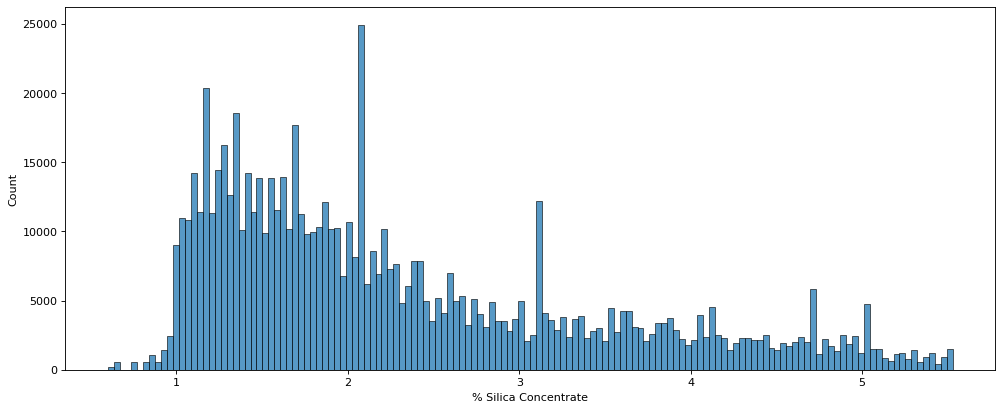

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(15, 6), dpi=80)
p = sns.histplot(data=df, x='% Silica Concentrate', ax=ax)

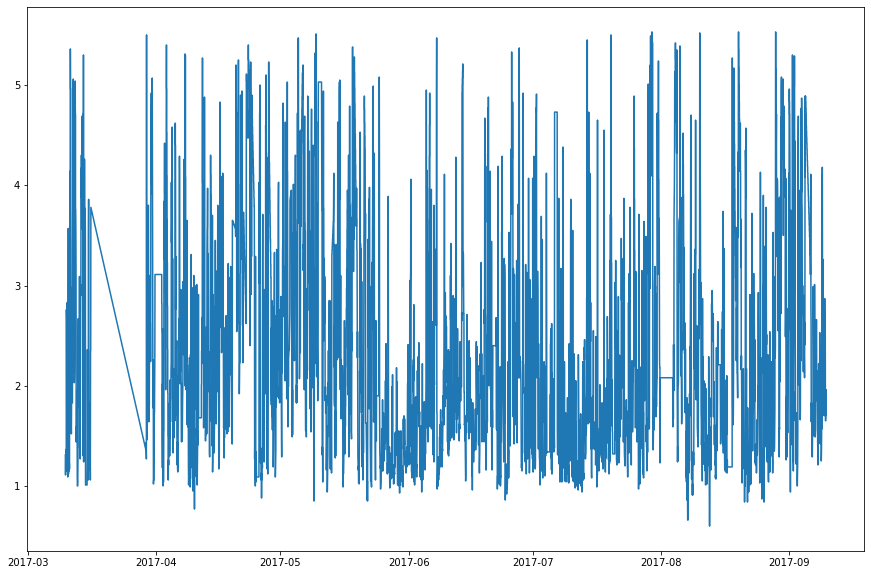

In [14]:
plt.figure(figsize = (15, 10))
plt.plot(df["date"], df["% Silica Concentrate"])
plt.show();

Devide the dataset to product and process data



In [15]:
df_prod = df[['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density','% Iron Concentrate', '% Silica Concentrate']]
df_proc = df[['Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow', 'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow', 'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow', 'Flotation Column 07 Air Flow', 'Flotation Column 01 Level', 'Flotation Column 02 Level', 'Flotation Column 03 Level', 'Flotation Column 04 Level', 'Flotation Column 05 Level', 'Flotation Column 06 Level', 'Flotation Column 07 Level', '% Iron Concentrate', '% Silica Concentrate']]

In [16]:
df_prod.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,% Iron Concentrate,% Silica Concentrate
0,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,66.91,1.31
1,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,66.91,1.31
2,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,66.91,1.31
3,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,66.91,1.31
4,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,66.91,1.31


In [17]:
df_proc.head()

,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,249.214,253.235,250.576,295.096,306.4,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,249.719,250.532,250.862,295.096,306.4,250.137,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,249.741,247.874,250.313,295.096,306.4,251.345,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,249.917,254.487,250.049,295.096,306.4,250.422,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,250.203,252.136,249.895,295.096,306.4,249.983,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [18]:
df_prod.corr().head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,% Iron Concentrate,% Silica Concentrate
% Iron Feed,1.000000,-0.971876,0.027868,-0.088133,0.161143,0.007687,-0.125663,0.055844,-0.077178
% Silica Feed,-0.971876,1.000000,-0.016089,0.078555,-0.151057,0.008036,0.104288,-0.044402,0.072673
Starch Flow,0.027868,-0.016089,1.000000,0.254749,0.042964,0.263501,0.225991,0.070063,-0.066819
Amina Flow,-0.088133,0.078555,0.254749,1.000000,0.212602,0.124029,0.655348,-0.110748,0.156985
Ore Pulp Flow,0.161143,-0.151057,0.042964,0.212602,1.000000,0.117986,0.012739,0.082777,0.008498


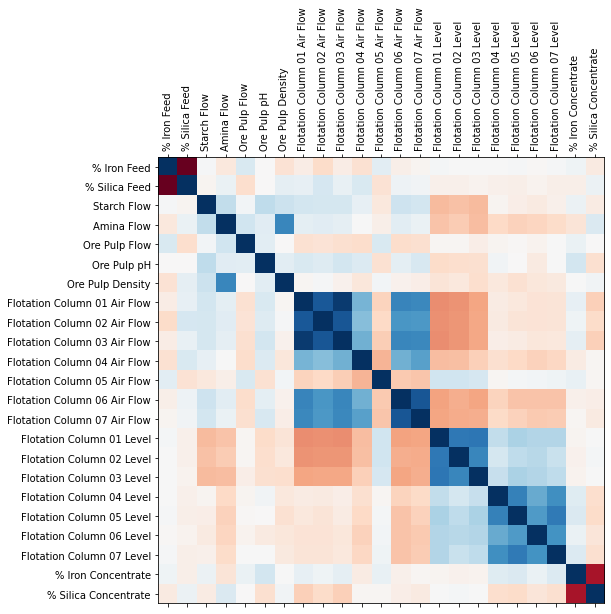

In [19]:
corr = df[1:].corr()

fig = plt.figure(figsize=(8,8)) 

plt.matshow(corr, cmap='RdBu', fignum=fig.number) 
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

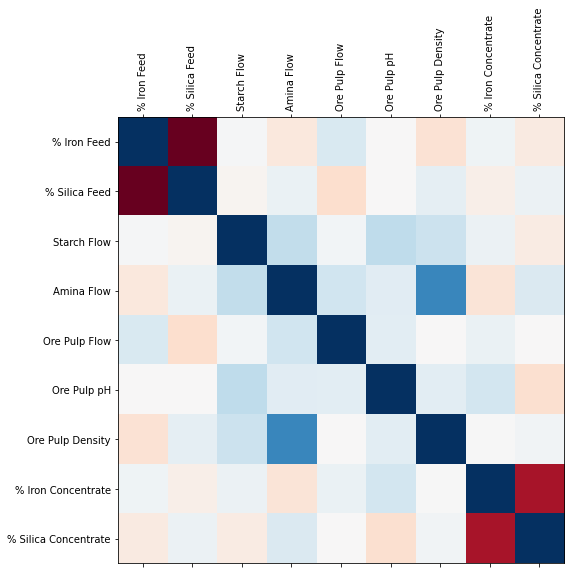

In [20]:
corr = df_prod.corr()

fig = plt.figure(figsize=(8,8)) 

plt.matshow(corr, cmap='RdBu', fignum=fig.number) 
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

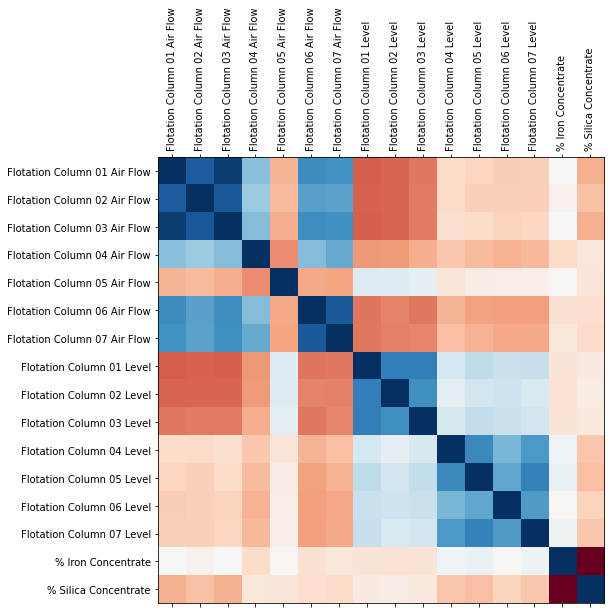

In [21]:
corr = df_proc.corr()

fig = plt.figure(figsize=(8,8)) 

plt.matshow(corr, cmap='RdBu', fignum=fig.number) 
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

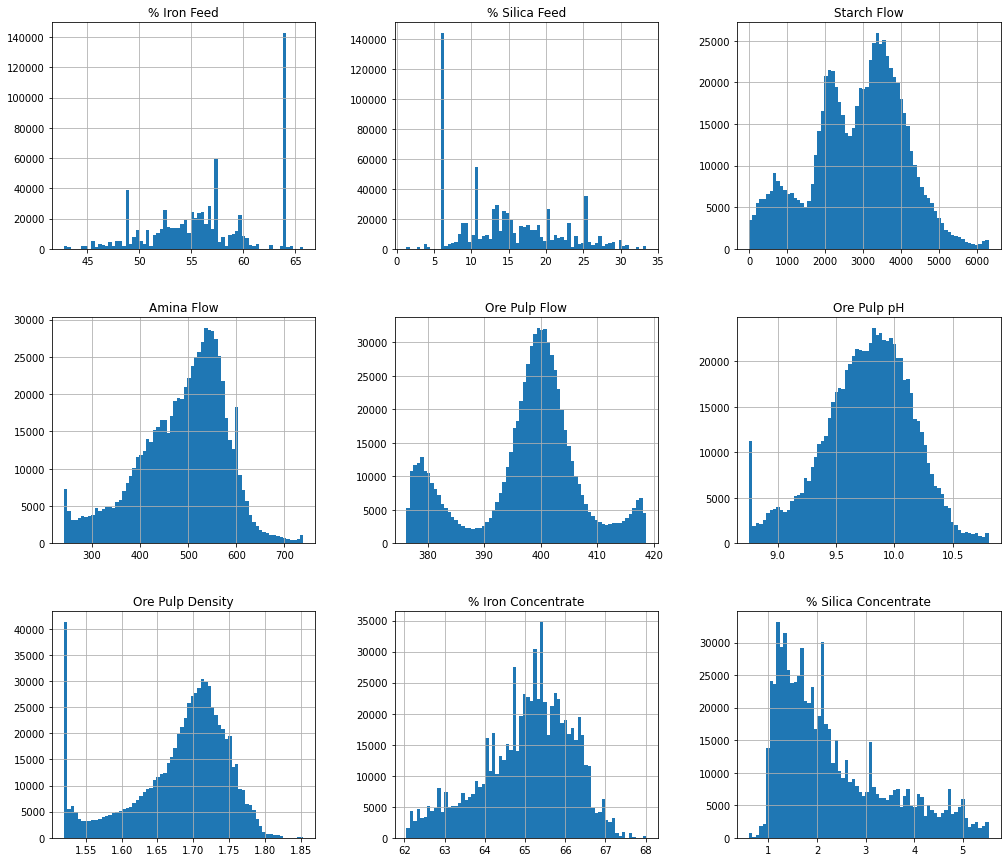

Text(0.5, 0.98, 'Product attributs distribution')

<Figure size 432x288 with 0 Axes>

In [22]:
from matplotlib import style

df_prod.hist(bins = 70, figsize = (17,15))
plt.show()
plt.suptitle('Product attributs distribution', color='w')

Removing outliers

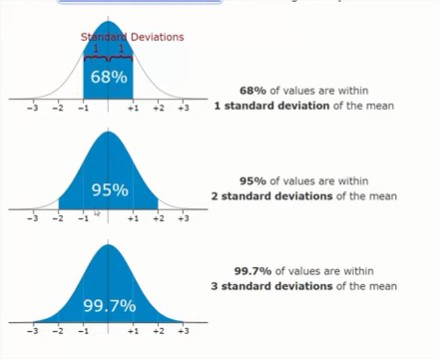

In [23]:
df_clean = df[1:].copy()
print(df_clean.shape)

def outlier(datacol):
  Q1, Q3 = np.percentile(datacol, [25,75])
  IQR = Q3 - Q1
  lower_outlier = Q1 - 1.5 * IQR
  upper_outlier = Q3 + 1.5 * IQR
  return lower_outlier,upper_outlier


for c in df_clean.columns:
  lower_outlier, upper_outlier = outlier(df_clean[c])
  outliers = df_clean[(df_clean[c] < lower_outlier) | (df_clean[c] > upper_outlier)]
  df_clean.drop(df_clean[ (df_clean[c] > upper_outlier) | (df_clean[c] < lower_outlier) ].index , inplace=True)

print(df_clean.shape)


(736266, 24)
(516511, 24)


Classification

In [24]:
final_df = df_clean.copy()

final_df['date'] = pd.to_datetime(final_df['date'])
final_df.index = final_df['date']
final_df = final_df.resample('H').mean()
df.dropna(inplace = True)

final_df.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,55.2,16.98,3163.452165,578.910104,398.770942,10.113760,1.729498,251.177960,250.208694,250.175988,...,250.204277,450.343243,446.972364,450.622040,449.948988,455.523590,464.487434,450.111873,66.91,1.31
2017-03-10 02:00:00,55.2,16.98,3133.256389,537.219661,399.871822,10.129742,1.667784,249.880589,250.214050,250.033317,...,249.897572,449.373361,450.249356,450.081222,450.328806,448.722983,455.501528,451.387700,67.06,1.11
2017-03-10 03:00:00,55.2,16.98,3479.482944,591.906744,398.763806,10.048403,1.732711,250.161328,250.104167,250.046350,...,250.484183,449.972878,450.868711,450.901822,451.145822,451.134189,459.981311,450.296722,66.97,1.27
2017-03-10 04:00:00,55.2,16.98,3228.036436,593.170106,399.866983,9.918614,1.731056,250.208772,250.204761,250.120861,...,250.157622,487.940706,491.462111,487.387206,494.528183,495.664011,502.763850,494.939889,66.75,1.36
2017-03-10 05:00:00,55.2,16.98,3327.280739,619.710806,399.615089,9.746029,1.765879,249.917800,250.160494,250.013500,...,250.078639,549.031539,549.983156,549.459572,549.975483,549.512533,560.696300,550.271772,66.63,1.34


In [25]:

# get labels 
final_df['Purity'] = 0
final_df['Purity'][final_df['% Silica Concentrate'] < 3] = 1
print(final_df['Purity'][final_df['Purity'] == 1].count())
print(final_df['Purity'][final_df['Purity'] == 0].count())
print(final_df['Purity'][final_df['Purity'] == 0].count() / final_df['Purity'][final_df['Purity'] == 1].count())

print(len(final_df))
final_df.dropna(inplace = True)
print(len(final_df))
final_df.head()

2651
1764
0.6654092795171633
4415
3422


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate,Purity
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,55.2,16.98,3163.452165,578.910104,398.770942,10.113760,1.729498,251.177960,250.208694,250.175988,...,450.343243,446.972364,450.622040,449.948988,455.523590,464.487434,450.111873,66.91,1.31,1
2017-03-10 02:00:00,55.2,16.98,3133.256389,537.219661,399.871822,10.129742,1.667784,249.880589,250.214050,250.033317,...,449.373361,450.249356,450.081222,450.328806,448.722983,455.501528,451.387700,67.06,1.11,1
2017-03-10 03:00:00,55.2,16.98,3479.482944,591.906744,398.763806,10.048403,1.732711,250.161328,250.104167,250.046350,...,449.972878,450.868711,450.901822,451.145822,451.134189,459.981311,450.296722,66.97,1.27,1
2017-03-10 04:00:00,55.2,16.98,3228.036436,593.170106,399.866983,9.918614,1.731056,250.208772,250.204761,250.120861,...,487.940706,491.462111,487.387206,494.528183,495.664011,502.763850,494.939889,66.75,1.36,1
2017-03-10 05:00:00,55.2,16.98,3327.280739,619.710806,399.615089,9.746029,1.765879,249.917800,250.160494,250.013500,...,549.031539,549.983156,549.459572,549.975483,549.512533,560.696300,550.271772,66.63,1.34,1


Classes count plot

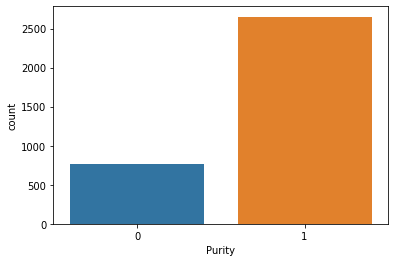

In [26]:
sns.countplot(x ='Purity', data = final_df)
plt.show()

Save csv to drive

In [27]:
final_df.to_csv( "/content/gdrive/MyDrive/Datascience/Datasets/dataset_after_ops.csv", index=True, encoding='utf-8')

In [28]:
df.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,736267.000000,736267.000000,736267.000000,736267.000000,736267.000000,736267.000000,736267.000000,736267.000000,736267.000000,736267.000000,...,736267.000000,736267.000000,736267.000000,736267.000000,736267.000000,736267.000000,736267.000000,736267.000000,736267.000000,736267.000000
mean,56.298326,14.648972,2869.637195,488.165672,397.570671,9.767312,1.680424,280.119479,277.120912,281.052215,...,290.740366,520.168000,522.555096,531.283553,420.168449,425.093109,429.888826,420.909055,65.049088,2.327270
std,5.160388,6.810769,1216.027892,91.254789,9.705521,0.387178,0.069205,29.633976,30.157069,28.571229,...,28.690738,131.086731,128.216830,150.933001,91.755676,84.478791,89.920247,84.899378,1.118723,1.125617
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,...,185.962000,149.218000,210.752000,126.255000,162.201000,166.991000,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.940000,2075.050000,431.835899,394.247044,9.527050,1.647390,250.278000,250.448000,250.847000,...,256.046000,416.900000,441.835000,411.255000,356.626000,357.595000,358.438000,356.704500,64.370000,1.440000
50%,56.080000,13.850000,3020.240000,504.352000,399.238000,9.797460,1.697580,299.341000,296.202000,298.690000,...,299.002000,491.749000,495.853000,494.183000,411.768000,408.648000,424.425000,410.938000,65.210000,2.000000
75%,59.720000,19.600000,3728.950000,553.336000,402.967000,10.037800,1.728380,300.147000,300.686000,300.385000,...,301.907000,594.097500,595.293000,601.300000,485.281500,484.005000,492.773000,476.141000,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,...,371.593000,862.274000,828.919000,886.822000,680.359000,675.644000,698.861000,659.902000,68.010000,5.530000


In [57]:
final_df.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate,Purity
count,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,...,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000
mean,56.645248,14.229360,2944.600245,498.168333,398.888168,9.793751,1.687825,280.302856,277.351280,281.084480,...,514.218982,516.758690,520.738910,420.651398,422.937101,427.598822,421.334114,65.156672,2.227924,0.774693
std,5.191059,6.763569,932.259828,71.785583,6.025333,0.356061,0.055679,28.356742,28.537622,27.886487,...,114.614056,112.177414,129.257483,70.956753,68.036803,68.622063,67.724137,1.055488,1.028194,0.417845
min,42.740000,1.310000,191.557158,251.593273,381.187331,8.826737,1.523038,175.885579,178.321303,177.202665,...,182.247735,232.122254,135.214506,172.936308,207.560218,201.988867,189.736659,62.231359,0.600000,0.000000
25%,52.920000,8.400000,2203.108305,449.562508,399.187857,9.567546,1.659524,250.089947,250.104485,250.091111,...,422.747038,448.838074,405.231552,352.391353,351.466886,354.979000,352.240370,64.500000,1.420000,1.000000
50%,56.420000,13.320000,2986.311298,507.363372,399.902656,9.811270,1.698054,299.831410,299.463849,299.868928,...,499.146243,499.251944,499.136637,401.652771,401.517512,409.310997,401.683089,65.280000,1.920000,1.000000
75%,60.180000,19.110000,3588.545408,550.119762,400.567205,10.042483,1.724355,299.959587,299.997712,299.951095,...,599.530525,598.756110,599.955580,495.484492,496.744468,491.770848,458.469891,65.930000,2.837500,1.000000
max,65.780000,33.400000,6162.603474,734.616804,416.039997,10.777489,1.833997,304.859605,311.369789,301.739500,...,852.538261,828.156777,881.717997,671.324068,665.770046,661.006050,646.870164,68.010000,5.142427,1.000000
